## 1. Involved vs Informational - Count of Occurence Analysis

_Ekaterina Levitskaya, Kara Kedrick, and Russell J Funk. "Investigating  writing style as a contributor to gender gaps in science and technology”. In: arXiv (2022). doi: 10.48550/arxiv.2204.13805. eprint: 2204.13805._

Involved features: emphasizing relationships
- pronouns (personal, possessive, wh-pronoun)
- non-phrasal coordination ("and")
- questions

Informational features: emphasizing facts
- determiners (predeterminers, wh-determiers, determiners) --> no stop word removal!
- verbs in past tense
- cardinal numbers

involved rate: (n_pron+n_and+n_q)/N_tokens * 100
informational rate: (n_det+n_pas+n_num)/N_tokens * 100
inv-inf-ratio: involved rate / informational rate

Method:
- segmenting into sentences unsing SaT model (https://arxiv.org/abs/2406.16678) and wtsplit https://github.com/segment-any-text/wtpsplit
- detecting questions using

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../../giicg.db")

prompts = pd.read_sql("Select * from expanded_prompts", conn)
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,normalized
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en,"parsing data from python iterator, how it coul..."
1,724,31,user,Write python function to do operations with in...,Write python function to do operations with in...,,,Man (cisgender),6,en,Write python function to do operations with in...
2,1124,53,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,Write shortest tutorial on creating RAG on ema...
3,1126,53,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,what is FAISS
4,1128,53,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,,Man (cisgender),6,en,Transform given code to process large .mbox file
...,...,...,...,...,...,...,...,...,...,...,...
701,1114,52,user,"ok and then last question: Why is ""Consolas"" l...","ok and then last question: Why is ""Consolas"" l...",,,Man (cisgender),91,en,"ok and then last question: Why is ""Consolas"" l..."
702,1116,52,user,i load it like this:\n\n@font-face {\n font...,i load it like this:,@font-face {\n font-family: 'Consolas';\n ...,,Man (cisgender),91,en,i load it like this:
703,1118,52,user,should i be able to open the .woff in windows ...,should i be able to open the .woff in windows ...,,,Man (cisgender),91,en,should i be able to open the .woff in windows ...
704,1120,52,user,"ok, i am not calling it in the body. how do i ...","ok, i am not calling it in the body. how do i ...",,,Man (cisgender),91,en,"ok, i am not calling it in the body. how do i ..."


In [2]:
from helpers.normalization import remove_punctuation_and_newlines, remove_capitalization

prompts['normalized'] = prompts['normalized'].apply(remove_punctuation_and_newlines)
prompts['normalized'] = prompts['normalized'].apply(remove_capitalization)
prompts

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,normalized
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en,parsing data from python iterator how it could...
1,724,31,user,Write python function to do operations with in...,Write python function to do operations with in...,,,Man (cisgender),6,en,write python function to do operations with in...
2,1124,53,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,write shortest tutorial on creating rag on ema...
3,1126,53,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,what is faiss
4,1128,53,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,,Man (cisgender),6,en,transform given code to process large mbox file
...,...,...,...,...,...,...,...,...,...,...,...
701,1114,52,user,"ok and then last question: Why is ""Consolas"" l...","ok and then last question: Why is ""Consolas"" l...",,,Man (cisgender),91,en,ok and then last question why is consolas load...
702,1116,52,user,i load it like this:\n\n@font-face {\n font...,i load it like this:,@font-face {\n font-family: 'Consolas';\n ...,,Man (cisgender),91,en,i load it like this
703,1118,52,user,should i be able to open the .woff in windows ...,should i be able to open the .woff in windows ...,,,Man (cisgender),91,en,should i be able to open the woff in windows p...
704,1120,52,user,"ok, i am not calling it in the body. how do i ...","ok, i am not calling it in the body. how do i ...",,,Man (cisgender),91,en,ok i am not calling it in the body how do i ca...


In [3]:
import spacy
import torch
import re
from wtpsplit import SaT
from transformers import AutoTokenizer, AutoModelForSequenceClassification


def load_spacy_lanuage_model() -> spacy.language.Language:
    try:
        return spacy.load("en_core_web_sm")
    except OSError:
        print("Downloading missing model...")
        spacy.cli.download("en_core_web_sm")
        return spacy.load("en_core_web_sm")


def load_segmentation_model():
    return SaT("sat-3l-sm")


def load_question_detection_model():
    tokenizer = AutoTokenizer.from_pretrained("mrsinghania/asr-question-detection")
    model = AutoModelForSequenceClassification.from_pretrained("mrsinghania/asr-question-detection")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    print("question model loaded")
    return tokenizer, model, device


def is_question(text: str, tokenizer, model, device) -> bool:
    if not isinstance(text, str) or text.strip() == "":
        return False
    inputs = tokenizer(text, return_tensors="pt", truncation=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=1).item()
    is_question = predicted_class == 1
    return is_question


def get_pronoun_count(text, spacy_model) -> int:
    doc = spacy_model(text)
    pronouns = [token.text for token in doc if token.pos_ == "PRON"]
    print("prnouns:", pronouns)
    return len(pronouns)


def get_and_count(text: str) -> int:
    matches = re.findall(r'\band\b', text)
    count = len(matches)
    print("and count:", count)
    return count


def get_determiner_count(text, spacy_model) -> int:
    doc = spacy_model(text)
    count = 0
    for token in doc:
        if token.tag_ == "DT":  # Regular determiners (includes "the", "a", "my")
            count += 1
        elif token.tag_ == "PDT":  # Predeterminers (e.g., "all", "such")
            count += 1
        elif token.tag_ == "WDT":  # WH-determiners (e.g., "which", "whatever")
            count += 1
    print("determiner count:", count)
    return count


def get_verb_past_tense_count(text, spacy_model) -> int:
    doc = spacy_model(text)
    count = 0
    for token in doc:
        if token.lower_ == "could":
            continue  # Skip "could"
        if token.tag_ == "VBD" or token.tag_ == "VBN":
            count += 1
    print("verb past tense count:", count)
    return count


def get_number_count(text, spacy_model) -> int:
    doc = spacy_model(text)
    count = 0
    for token in doc:
        if token.pos_ == "NUM": count += 1
    print("number count:", count)
    return count


def get_question_count(text: str, tokenizer, model, device, sat) -> int:
    segmented = sat.split(text)
    count = 0
    for sentence in segmented:
        if is_question(sentence, tokenizer, model, device):
            count += 1
    print("question count:", count)
    return count


def compute_involved(text: str, tokenizer, model, device, sat, spacy_model) -> float:
    print("computing involved score for text: ", text, " ...")
    tokens = spacy_model(text)
    n_pronoun = get_pronoun_count(text, spacy_model)
    print("n_pronoun:", n_pronoun)
    n_and = get_and_count(text)
    print("n_and:", n_and)
    n_question = get_question_count(text, tokenizer, model, device, sat)
    print("n_question:", n_question)
    score = ((n_pronoun + n_and + n_question) / len(tokens)) * 100
    print("involved score:", score)
    return score


def compute_informational(text: str, spacy_model) -> float:
    print("computing informational score for text: ", text, " ...")
    tokens = spacy_model(text)
    n_determiner = get_determiner_count(text, spacy_model)
    n_verb_past_tense = get_verb_past_tense_count(text, spacy_model)
    n_number = get_number_count(text, spacy_model)
    score = ((n_determiner + n_verb_past_tense + n_number) / len(tokens)) * 100
    print("informational score:", score)
    return score


def compute_inv_inf_ratio(inv: float, inf: float) -> float:
    if inf == 0:
        return inv
    return inv / inf


def extract_involved_informational_features(df):
    modified = df.copy()
    spacy_model = load_spacy_lanuage_model()
    sat = load_segmentation_model()
    tokenizer, question_model, device = load_question_detection_model()
    print("computing involved score...")
    modified['involved'] = modified['normalized'].apply(compute_involved,
                                                        args=(tokenizer, question_model, device, sat, spacy_model))
    print("computing informational score...")
    modified['informational'] = modified['normalized'].apply(compute_informational, args=(spacy_model,))
    print("computing ratio..")
    modified['inv-inf'] = modified.apply(lambda row: compute_inv_inf_ratio(row['involved'], row['informational']),
                                         axis=1)
    return modified


def extract_single_counts(df):
    modified = df.copy()
    spacy_model = load_spacy_lanuage_model()
    sat = load_segmentation_model()
    tokenizer, question_model, device = load_question_detection_model()
    modified['n_pronouns'] = modified['normalized'].apply(get_pronoun_count, args=(spacy_model,))
    modified['n_questions'] = modified['normalized'].apply(get_question_count,
                                                           args=(tokenizer, question_model, device, sat))
    modified['n_and'] = modified['normalized'].apply(get_and_count)
    modified['n_det'] = modified['normalized'].apply(get_determiner_count, args=(spacy_model,))
    modified['n-verbs'] = modified['normalized'].apply(get_verb_past_tense_count, args=(spacy_model,))
    modified['n_numbers'] = modified['normalized'].apply(get_number_count, args=(spacy_model,))
    return modified


inv_inf_scores = extract_involved_informational_features(prompts)

scores = extract_single_counts(prompts)
scores


question model loaded
computing involved score...
computing involved score for text:  parsing data from python iterator how it could be handled by spark when passing integer to it  ...
prnouns: ['it', 'it']
n_pronoun: 2
and count: 0
n_and: 0


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


question count: 0
n_question: 0
involved score: 11.76470588235294
computing involved score for text:  write python function to do operations with incoming pandas dataframes like following   i have two dataframes one named a with schema like following recordid	recordtimestamp	updatedtimestamp	reportdt	source	metricname	metricnum	metricvalue  anothers with name b schema is reportdt	source	metricname	metricnum	metricvalue  i need to compare if any rows from a are updated in b  one case we have updated rows from a in dataset b   1 set updated timestamp  current timestamp in database for all of these rows where condition is true  write the sql query for that 2 add newer rows to those we need to insert add related insert sql stmt   second case we have new rows in dataset b  upload data to db with all these new rows  ...
prnouns: ['i', 'a', 'i', 'a', 'we', 'all', 'those', 'we', 'we']
n_pronoun: 9
and count: 0
n_and: 0
question count: 0
n_question: 0
involved score: 6.338028169014084
computing

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


prnouns: []
prnouns: ['i']
prnouns: ['you']
prnouns: []
prnouns: ['what']
prnouns: []
prnouns: ['i']
prnouns: ['i']
prnouns: ['it']
prnouns: ['i', 'that', 'i', 'it', 'they']
prnouns: []
prnouns: ['i', 'it', 'this']
prnouns: ['i']
prnouns: ['i', 'it', 'i', 'it']
prnouns: ['i']
question count: 0
question count: 0
question count: 0
question count: 1
question count: 0
question count: 1
question count: 1
question count: 1
question count: 1
question count: 1
question count: 1
question count: 1
question count: 1
question count: 1
question count: 1
question count: 1
question count: 1
question count: 0
question count: 1
question count: 1
question count: 0
question count: 0
question count: 0
question count: 1
question count: 1
question count: 0
question count: 1
question count: 0
question count: 0
question count: 0
question count: 2
question count: 1
question count: 0
question count: 0
question count: 0
question count: 0
question count: 0
question count: 1
question count: 0
question count: 0
que

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,normalized,n_pronouns,n_questions,n_and,n_det,n-verbs,n_numbers
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en,parsing data from python iterator how it could...,2,0,0,0,1,0
1,724,31,user,Write python function to do operations with in...,Write python function to do operations with in...,,,Man (cisgender),6,en,write python function to do operations with in...,9,0,0,11,5,5
2,1124,53,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,write shortest tutorial on creating rag on ema...,0,0,0,0,0,0
3,1126,53,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,what is faiss,1,1,0,0,0,0
4,1128,53,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,,Man (cisgender),6,en,transform given code to process large mbox file,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1114,52,user,"ok and then last question: Why is ""Consolas"" l...","ok and then last question: Why is ""Consolas"" l...",,,Man (cisgender),91,en,ok and then last question why is consolas load...,0,0,1,0,1,0
702,1116,52,user,i load it like this:\n\n@font-face {\n font...,i load it like this:,@font-face {\n font-family: 'Consolas';\n ...,,Man (cisgender),91,en,i load it like this,3,0,0,1,0,0
703,1118,52,user,should i be able to open the .woff in windows ...,should i be able to open the .woff in windows ...,,,Man (cisgender),91,en,should i be able to open the woff in windows p...,1,1,0,1,0,0
704,1120,52,user,"ok, i am not calling it in the body. how do i ...","ok, i am not calling it in the body. how do i ...",,,Man (cisgender),91,en,ok i am not calling it in the body how do i ca...,4,1,0,1,0,0


In [6]:
inv_inf_scores

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,normalized,involved,informational,inv-inf
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en,parsing data from python iterator how it could...,11.764706,5.882353,2.000000
1,724,31,user,Write python function to do operations with in...,Write python function to do operations with in...,,,Man (cisgender),6,en,write python function to do operations with in...,6.338028,14.788732,0.428571
2,1124,53,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,write shortest tutorial on creating rag on ema...,0.000000,0.000000,0.000000
3,1126,53,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,what is faiss,66.666667,0.000000,66.666667
4,1128,53,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,,Man (cisgender),6,en,transform given code to process large mbox file,0.000000,12.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1114,52,user,"ok and then last question: Why is ""Consolas"" l...","ok and then last question: Why is ""Consolas"" l...",,,Man (cisgender),91,en,ok and then last question why is consolas load...,6.666667,6.666667,1.000000
702,1116,52,user,i load it like this:\n\n@font-face {\n font...,i load it like this:,@font-face {\n font-family: 'Consolas';\n ...,,Man (cisgender),91,en,i load it like this,60.000000,20.000000,3.000000
703,1118,52,user,should i be able to open the .woff in windows ...,should i be able to open the .woff in windows ...,,,Man (cisgender),91,en,should i be able to open the woff in windows p...,15.384615,7.692308,2.000000
704,1120,52,user,"ok, i am not calling it in the body. how do i ...","ok, i am not calling it in the body. how do i ...",,,Man (cisgender),91,en,ok i am not calling it in the body how do i ca...,27.777778,5.555556,5.000000


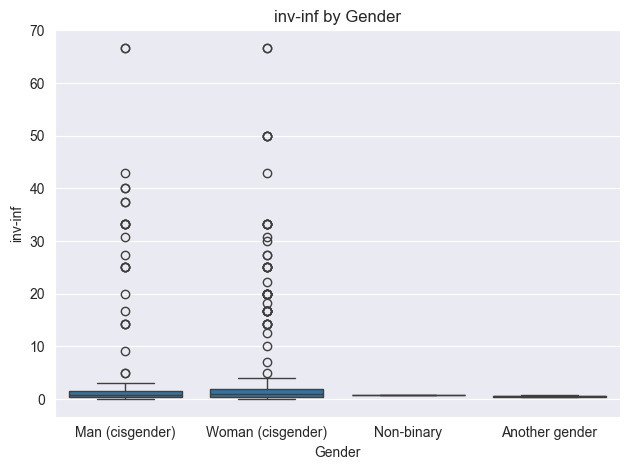

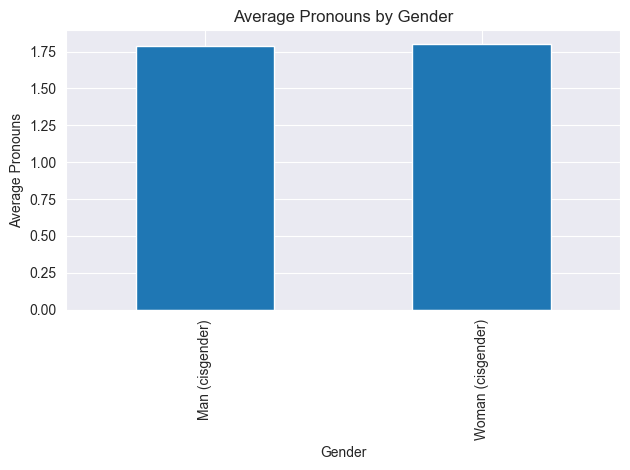

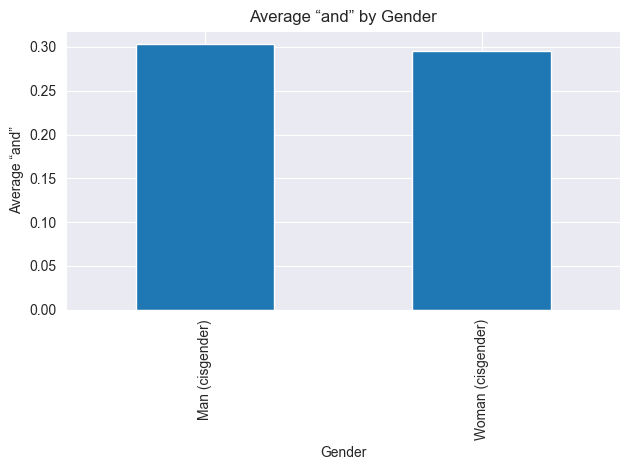

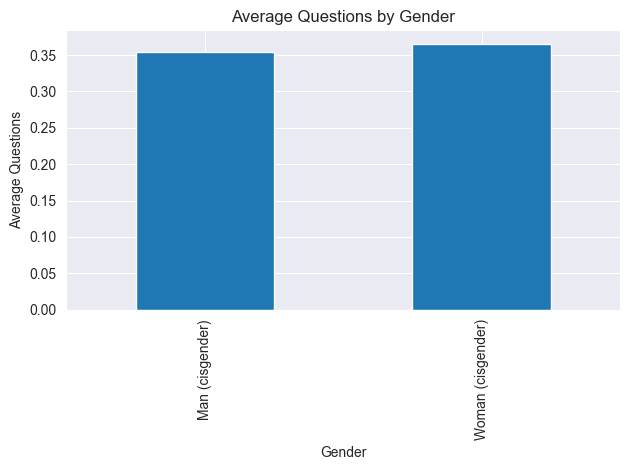

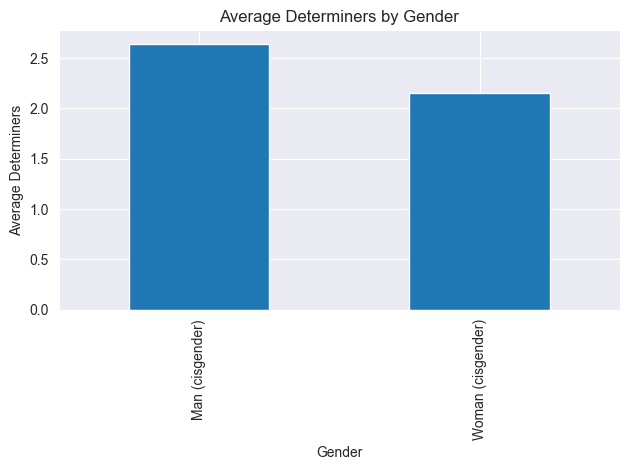

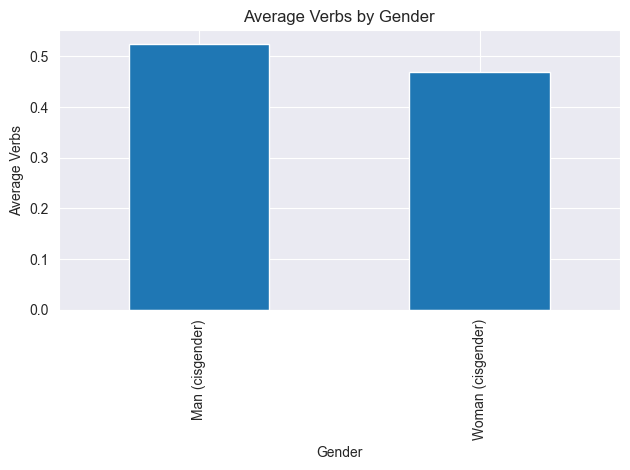

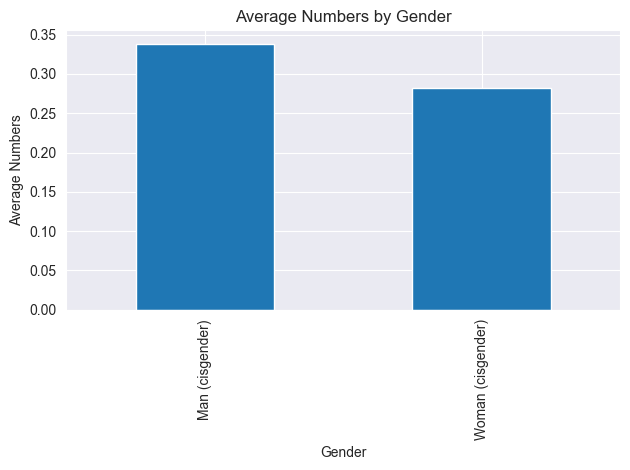

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'gender' and calculate the mean of 'inv-inf'
avg_values = inv_inf_scores.groupby('gender')['inv-inf'].mean().reset_index()

sns.boxplot(x='gender', y='inv-inf', data=inv_inf_scores)
plt.xlabel('Gender')
plt.ylabel('inv-inf')
plt.title('inv-inf by Gender')
plt.tight_layout()
plt.show()


filtered_scores = scores[scores['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]

columns = ['n_pronouns', 'n_and', 'n_questions', 'n_det', 'n-verbs', 'n_numbers']
y_labels = {'n_pronouns': 'Average Pronouns', 'n_and': 'Average “and”', 'n_questions': 'Average Questions',
            'n_det': 'Average Determiners', 'n-verbs': 'Average Verbs', 'n_numbers': 'Average Numbers'}
for column in columns:
    avg_values = filtered_scores.groupby('gender')[column].mean()
    # Plot the result
    avg_values.plot(kind='bar')
    plt.xlabel('Gender')
    plt.ylabel(y_labels[column])
    plt.title(f'{y_labels[column]} by Gender')
    plt.tight_layout()
    plt.show()

